In [166]:
import time
import numpy as np
import matplotlib.pyplot as plt
import utils_img_rec as ut

import pathlib

import cv2
from cv2 import Canny

import pickle
inicio = time.time()

from PIL import Image

def expand2square(rgb_img, background_color=(0, 0, 0)):
    '''fill the with the background_color (grayscale take the mean) to have height = width'''
    pil_img = Image.fromarray(rgb_img)

    if pil_img.mode == 'L':
        background_color = int(
            (background_color[0] + background_color[1] + background_color[2])/3)

    elif pil_img.mode == 'RGB':
        pass

    else:
        raise Exception("No Grayscale or RGB identified")

    width, height = pil_img.size

    if width == height:
        return rgb_img

    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return np.asarray(result)

    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return np.asarray(result)

In [167]:
#DATADIR = r"..\..\..\_DATA_\image\face\faustao\faustao.jpg"
DATADIR = "ratinho.jpg"

path = pathlib.Path(DATADIR)
print(path)

ratinho.jpg


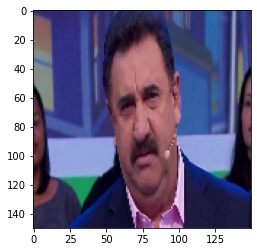

In [168]:
img = cv2.imread(str(path) ,cv2.cv2.IMREAD_COLOR)
img = cv2.resize(img, (150, 150))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb = expand2square(img_rgb)

plt.imshow(img_rgb, cmap='gray')
plt.show()

In [169]:
from scipy.ndimage import gaussian_filter

def gaussian(img, sig=1.0, fill='nearest' ):#***************************************************8
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return gaussian_filter(img, sigma=sig, order=0, cval=0.0, truncate=4.0, mode=fill)

def blur_p(img):
    img = cv2.medianBlur(img,  9)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb, cmap='gray')
    plt.show() 

def sobel_p(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

    sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0) 
    sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1) 
    sobelX = np.uint8(np.absolute(sobelX)) 
    sobelY = np.uint8(np.absolute(sobelY)) 
    sobel = cv2.bitwise_or(sobelX, sobelY) 

    img_rgb = cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb, cmap='gray')
    plt.show()

def equal_hist_p(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = cv2.equalizeHist(img)

    plt.imshow(img, cmap='gray')
    plt.show() 

def gaussian_blur(img, kernel_size):
    #img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

    #img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    smooth = cv2.GaussianBlur(gray, (25,25), 0)
    division = cv2.divide(gray, smooth, scale=255)

    plt.imshow(division, cmap='gray')
    plt.show()
    return division

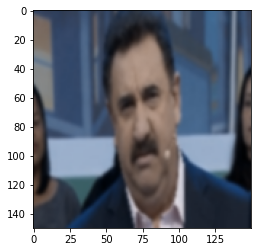

In [170]:
plt.imshow(gaussian(img), cmap='gray')
plt.show() 